In [13]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import fpsnippets
%matplotlib inline
data = pd.read_csv("farmers market.csv")
df = pd.DataFrame(data)
print(df.head())

    _id  fid                                          name          x  \
0  4159    1              5 Generation Bakers—Green Grocer -80.068177   
1  4160    2  A Child’s World Day Care Center—Green Grocer -79.881320   
2  4161    3       Alma Illery Medical Center—Green Grocer -79.896214   
3  4162    4                         Aspinwall Flea Market -79.904517   
4  4163    5              Bachman’s Greenhouse and Nursery -79.711238   

           y               location                address             city  \
0  40.465622                         1100 Chartiers Avenue     McKees Rocks   
1  40.412364                              300 Rankin Blvd.           Rankin   
2  40.454592                          7227 Hamilton Avenue       Pittsburgh   
3  40.489755  Municipal parking lot      250 Freeport Road       Pittsburgh   
4  40.639294                            2903 Freeport Road  Natrona Heights   

  state    zip                  day_time         season  
0    PA  15136  Tuesday 12:0

In [15]:
def city_filter(group):
    return group.name == "Pittsburgh"
    
markit = df.groupby('city').filter(city_filter)
print(markit)

     _id  fid                                             name          x  \
2   4161    3          Alma Illery Medical Center—Green Grocer -79.896214   
3   4162    4                            Aspinwall Flea Market -79.904517   
7   4166    8              Beechview Farmer’s Market—Citiparks -80.024680   
9   4168   10                       Bloomfield Farmer’s Market -79.944362   
12  4171   13                 Carrick Dairy District—Citiparks -79.988647   
17  4176   18                     East Liberty Farmer’s Market -79.926390   
20  4179   21                             Etna Farmer’s Market -79.944055   
22  4181   23                   Farmer’s Co-Op of East Liberty -79.921400   
23  4182   24  Farmer’s Market at the University of Pittsburgh -79.964305   
24  4183   25                     Forest Hills Farmer’s Market -79.861137   
25  4184   26                       Fox Chapel Farmer’s Market -79.891391   
26  4185   27                 GAP Park (Millvale)—Green Grocer -79.974462   

In [101]:
#markit['zip'] = df['zip'].astype(str)
#markit['neighborhoods'] = markit['zip'].apply(fpsnippets.zip_to_neighborhoods)
#print(markit)

The fpsnippets didn't work, so I just took the names and assigned a neighborhood to each market based on the names, only checking on google maps the ones without a neighborhood in the name.

In [33]:
markit.at[2, 'neighborhoods'] = 'Homewood'
markit.at[3, 'neighborhoods'] = 'Aspinwall'
markit.at[7, 'neighborhoods'] = 'Beechview'
markit.at[9, 'neighborhoods'] = 'Bloomfield'
markit.at[12, 'neighborhoods'] = 'Carrick'
markit.at[17, 'neighborhoods'] = 'East Liberty'
markit.at[20, 'neighborhoods'] = 'Etna' 
markit.at[22, 'neighborhoods'] = 'East Liberty'
markit.at[23, 'neighborhoods'] = 'Central Oakland'
markit.at[24, 'neighborhoods'] = 'Forest Hills'
markit.at[25, 'neighborhoods'] = 'Fox Chapel'
markit.at[26, 'neighborhoods'] = 'Millvale'
markit.at[28, 'neighborhoods'] = 'Green Tree' 
markit.at[31, 'neighborhoods'] = 'East Liberty'
markit.at[33, 'neighborhoods'] = 'Lawrenceville'
markit.at[34, 'neighborhoods'] = 'Plum' 
markit.at[35, 'neighborhoods'] = 'Downtown'
markit.at[36, 'neighborhoods'] = 'Ross' 
markit.at[37, 'neighborhoods'] = 'Downtown'
markit.at[41, 'neighborhoods'] = 'Mt. Lebanon'
markit.at[42, 'neighborhoods'] = 'Mt. Lebanon'
markit.at[43, 'neighborhoods'] = 'North Side'
markit.at[44, 'neighborhoods'] = 'Central Oakland'
markit.at[47, 'neighborhoods'] = 'Penn Hills' 
markit.at[48, 'neighborhoods'] = 'South Side Slopes'
markit.at[49, 'neighborhoods'] = 'Pleasant Hills'
markit.at[51, 'neighborhoods'] = 'Ross' 
markit= markit.reset_index()
print(markit)

    level_0  index     _id   fid  \
0         0    2.0  4161.0   3.0   
1         1    3.0  4162.0   4.0   
2         2    7.0  4166.0   8.0   
3         3    9.0  4168.0  10.0   
4         4   12.0  4171.0  13.0   
5         5   17.0  4176.0  18.0   
6         7   22.0  4181.0  23.0   
7         8   23.0  4182.0  24.0   
8        10   25.0  4184.0  26.0   
9        13   31.0  4190.0  32.0   
10       14   33.0  4192.0  34.0   
11       16   35.0  4194.0  36.0   
12       18   37.0  4196.0  38.0   
13       21   43.0  4202.0  44.0   
14       22   44.0  4203.0  45.0   
15       23   47.0  4206.0  48.0   
16       24   48.0  4207.0  49.0   
17        9    NaN     NaN   NaN   
18       12    NaN     NaN   NaN   
19       17    NaN     NaN   NaN   
20       20    NaN     NaN   NaN   
21       25    NaN     NaN   NaN   
22       26    NaN     NaN   NaN   
23       28    NaN     NaN   NaN   
24       31    NaN     NaN   NaN   
25       33    NaN     NaN   NaN   
26       34    NaN     NaN  

In [35]:
markit = markit.drop([6, 9, 12, 15, 11, 17, 19, 20,25, 26])
print(markit)

    level_0  index     _id   fid  \
0         0    2.0  4161.0   3.0   
1         1    3.0  4162.0   4.0   
2         2    7.0  4166.0   8.0   
3         3    9.0  4168.0  10.0   
4         4   12.0  4171.0  13.0   
5         5   17.0  4176.0  18.0   
7         8   23.0  4182.0  24.0   
8        10   25.0  4184.0  26.0   
10       14   33.0  4192.0  34.0   
13       21   43.0  4202.0  44.0   
14       22   44.0  4203.0  45.0   
16       24   48.0  4207.0  49.0   
18       12    NaN     NaN   NaN   
21       25    NaN     NaN   NaN   
22       26    NaN     NaN   NaN   
23       28    NaN     NaN   NaN   
24       31    NaN     NaN   NaN   
27       35    NaN     NaN   NaN   
28       36    NaN     NaN   NaN   
29       37    NaN     NaN   NaN   
30       41    NaN     NaN   NaN   
31       42    NaN     NaN   NaN   
32       43    NaN     NaN   NaN   
33       44    NaN     NaN   NaN   
34       47    NaN     NaN   NaN   
35       48    NaN     NaN   NaN   
36       49    NaN     NaN  

In [21]:
market_counts = markit['neighborhoods'].value_counts().reset_index()
market_counts.columns = ['neighborhood', 'market_count']
print(market_counts)

       neighborhood  market_count
0      East Liberty             3
1   Central Oakland             2
2          Downtown             2
3          Homewood             1
4         Aspinwall             1
5         Beechview             1
6        Bloomfield             1
7           Carrick             1
8        Fox Chapel             1
9     Lawrenceville             1
10        Northside             1
11       Penn Hills             1
12       South Side             1


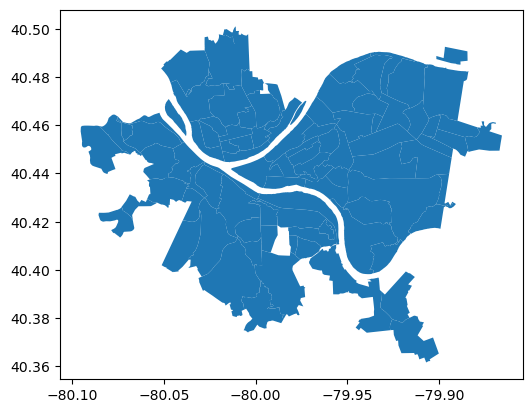

In [37]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe
plt.show()

In [39]:
market_map = neighborhoods.merge(market_counts, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
market_map[['hood','market_count','geometry']]

,hood,market_count,geometry
0,Central Oakland,2.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,NaN,"POLYGON ((-79.9623 40.44294, -79.9622 40.44289..."
3,Crawford-Roberts,NaN,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,NaN,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
...,...,...,...
85,Ridgemont,NaN,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."
86,West End,NaN,"POLYGON ((-80.02869 40.44454, -80.02845 40.444..."
87,California-Kirkbride,NaN,"POLYGON ((-80.02039 40.46285, -80.02022 40.462..."
88,Glen Hazel,NaN,"POLYGON ((-79.9203 40.41205, -79.92027 40.4120..."


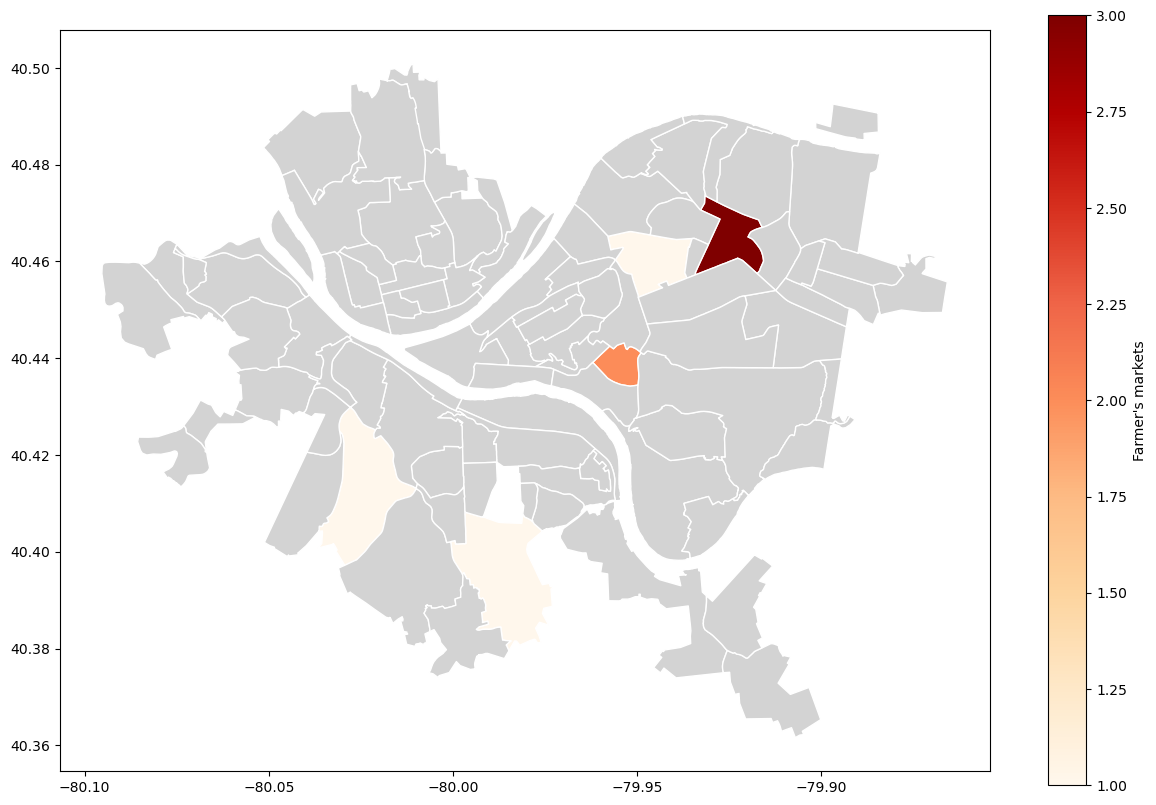

In [41]:
market_map.plot(column='market_count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Farmer's markets"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
plt.show()

The neighborhood with the most farmers markets is East Liberty!